# Visualizing Earnings Based On College Majors

## Context

"For the analysis we are goin to work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was released by American Community Survey. FiveThirtyEight cleaned the data and release it on their github repository.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* __Rank__ - Rank by median earnings (the dataset is ordered by this column).  
* __Major_code__ - Major code.  
* __Major__ - Major description.  
* __Major_category__ - Category of major.  
* __Total__ - Total number of people with major.  
* __Sample_size__ - Sample size (unweighted) of full-time.  
* __Men__ - Male graduates.  
* __Women__ - Female graduates.  
* __ShareWomen__ - Women as share of total.  
* __Employed__ - Number employed.  
* __Median__ - Median salary of full-time, year-round workers.  
* __Low_wage_jobs__ - Number in low-wage service jobs.  
* __Full_time__ - Number employed 35 hours or more.  
* __Part_time__ - Number employed less than 35 hours."

## Introduction

In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset into a DataFrame
recent_grads = pd.read_csv('recent-grads.csv')

### Exploring the Data

In [2]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
# Looking up the number of rows in the data
raw_data_counts = recent_grads.shape[0]
raw_data_counts

173

In [7]:
# Dropping rows with missing values
recent_grads = recent_grads.dropna()

# Looking up the number of rows in the cleaned data
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

If we look at the difference between __raw_data_counts__ and __cleaned_data_count__, only one row that was not containing any data was dropped.

## Analysis

### Scatter Plots with Pandas

Scatter plots of the data can help us answer the following questions:
- Do students in more popular major make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

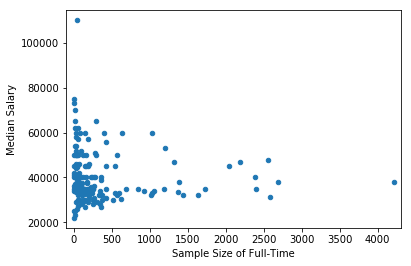

In [8]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_xlim(recent_grads['Sample_size'].min()-100,recent_grads['Sample_size'].max()+100)
ax1.set_xlabel("Sample Size of Full-Time")
ax1.set_ylabel("Median Salary");

This scatter plot of the median salary vs. the sample size of full-time indicates that people graduating from the most popular majors do not make more money. This plot shows no correlation between them.

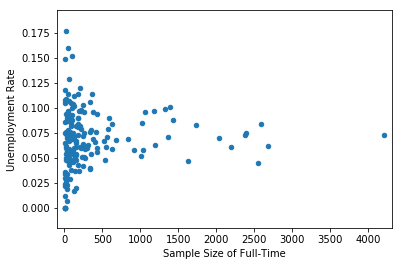

In [9]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_xlim(recent_grads['Sample_size'].min()-100,recent_grads['Sample_size'].max()+100)
ax2.set_xlabel("Sample Size of Full-Time")
ax2.set_ylabel("Unemployment Rate");

This scatter plot of the unemployment rate vs. the sample size of full-time shows that the people graduating from the most popular majors do not necessarily experience lower unemployment rates. This plot shows no correlation between them.

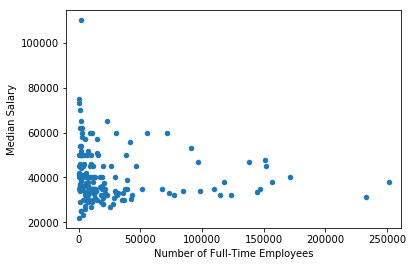

In [10]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_xlim(recent_grads['Full_time'].min()-10000,recent_grads['Full_time'].max()+10000)
ax3.set_xlabel("Number of Full-Time Employees")
ax3.set_ylabel("Median Salary");

From the scatter plot of the median salary vs. the number of full-time employees, we observe no correlation between them.

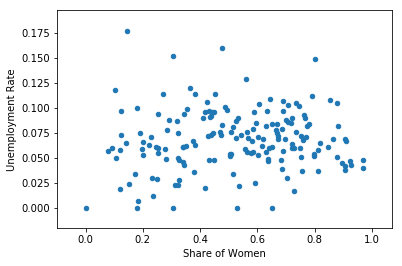

In [11]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_xlim(recent_grads['ShareWomen'].min()-0.1,recent_grads['ShareWomen'].max()+0.1)
ax4.set_xlabel("Share of Women")
ax4.set_ylabel("Unemployment Rate");

The plot of the unemployment rate vs. the share of women shows that there is no correlation between unemployment rate and the share of women in the different majors. Students that majored in subjects that were majority female do not make more money.

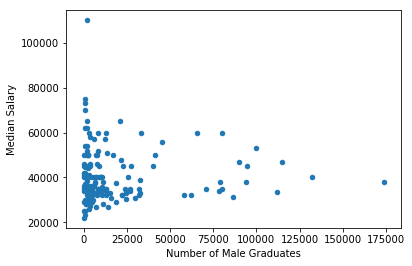

In [12]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_xlim(recent_grads['Men'].min()-10000,recent_grads['Men'].max()+10000)
ax5.set_xlabel("Number of Male Graduates")
ax5.set_ylabel("Median Salary");

We observe no correlation between the number of male graduates and the median salary.

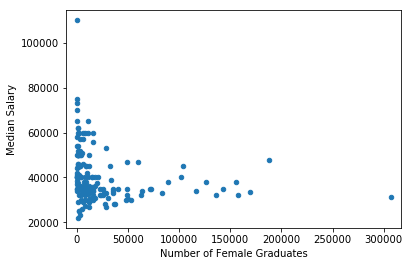

In [13]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_xlim(recent_grads['Women'].min()-10000,recent_grads['Women'].max()+10000)
ax6.set_xlabel("Number of Female Graduates")
ax6.set_ylabel("Median Salary");

We observe no correlation between the number of female graduates and the median salary.
We can observe on the two previous plots that the median salary for female graduates seems to be lower than for male graduates.

### Histograms with Pandas

Histograms of the data can help us answer the following questions:
- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?

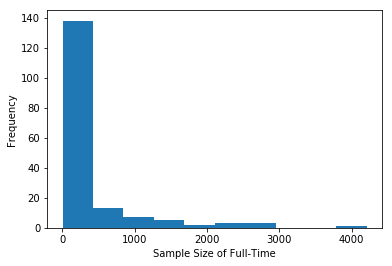

In [14]:
ax7 = recent_grads['Sample_size'].plot(kind='hist')
ax7.set_xlabel("Sample Size of Full-Time");

Approximately 80% of our sample sizes are smaller than 500 people.

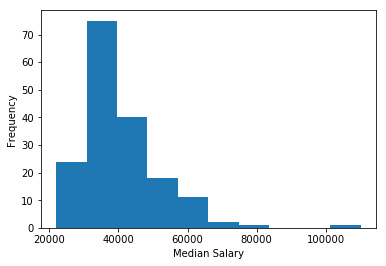

In [15]:
ax8 = recent_grads['Median'].plot(kind='hist')
ax8.set_xlabel("Median Salary");

The most common median salary range is \$30,000 - \$40,000.

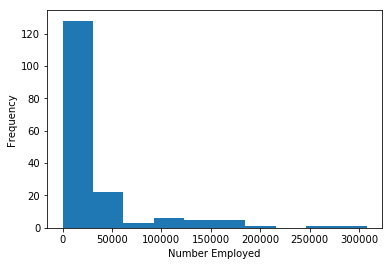

In [16]:
ax9 = recent_grads['Employed'].plot(kind='hist')
ax9.set_xlabel("Number Employed");

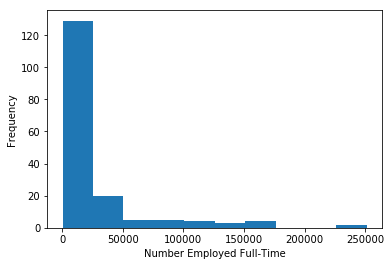

In [17]:
ax10 = recent_grads['Full_time'].plot(kind='hist')
ax10.set_xlabel("Number Employed Full-Time");

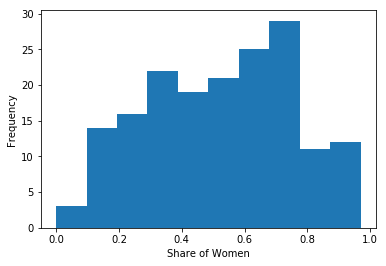

In [18]:
ax11 = recent_grads['ShareWomen'].plot(kind='hist')
ax11.set_xlabel("Share of Women");

Almost 54% of the majors are predominantly female.

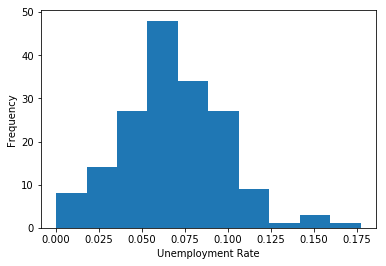

In [19]:
ax12 = recent_grads['Unemployment_rate'].plot(kind='hist')
ax12.set_xlabel("Unemployment Rate");

The most commun unemployment rate is between 0.052 and 0.071 

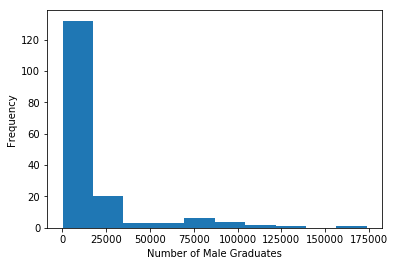

In [20]:
ax13 = recent_grads['Men'].plot(kind='hist')
ax13.set_xlabel("Number of Male Graduates");

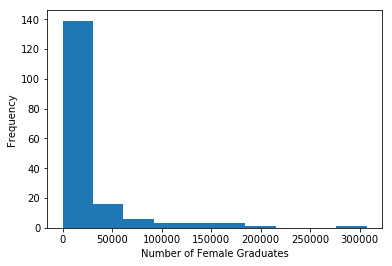

In [21]:
ax14 = recent_grads['Women'].plot(kind='hist')
ax14.set_xlabel("Number of Female Graduates");

### Scatter Matrix plots with Pandas

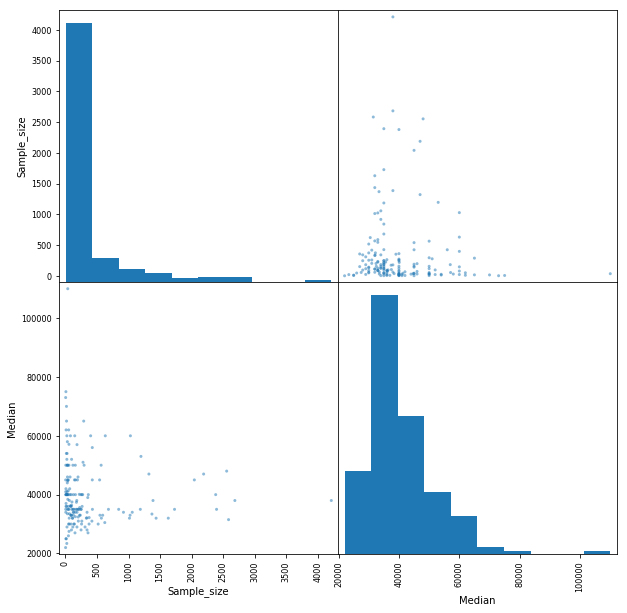

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10));

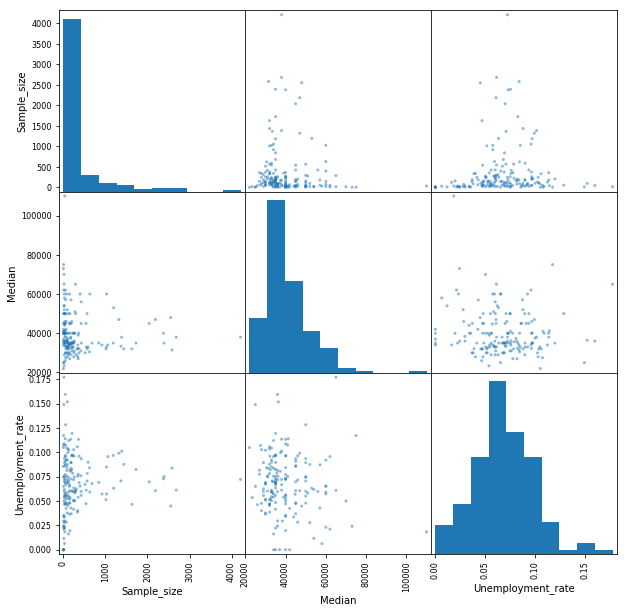

In [23]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10));

### Bar plots with Pandas

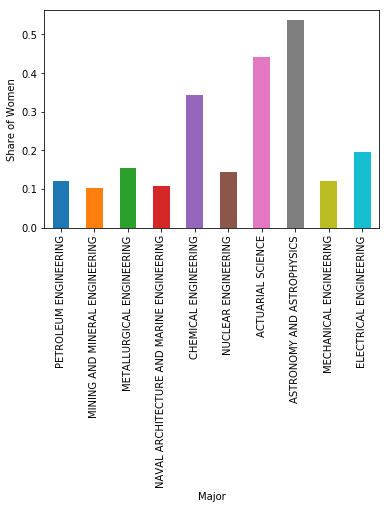

In [24]:
ax15 = recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
ax15.set_ylabel("Share of Women");

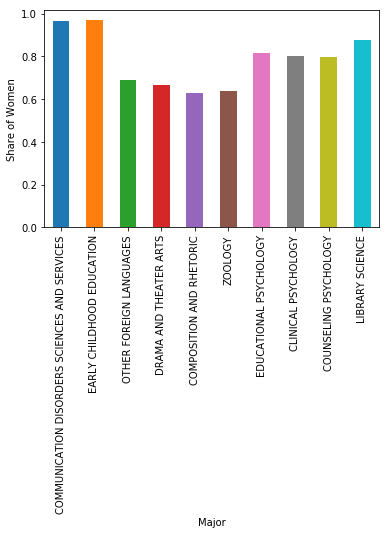

In [25]:
ax16 = recent_grads[162:].plot.bar(x='Major', y='ShareWomen', legend=False)
ax16.set_ylabel("Share of Women");

The last 10 majors show higher percentage of women than for the first 10 majors.

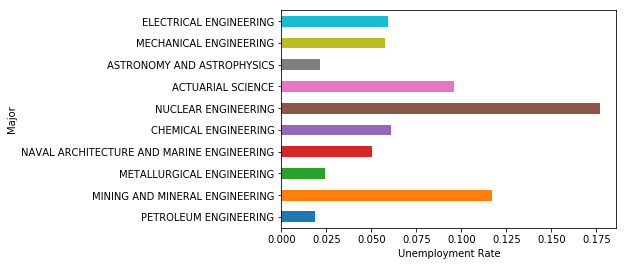

In [26]:
ax17 = recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate', legend=False)
ax17.set_xlabel("Unemployment Rate");

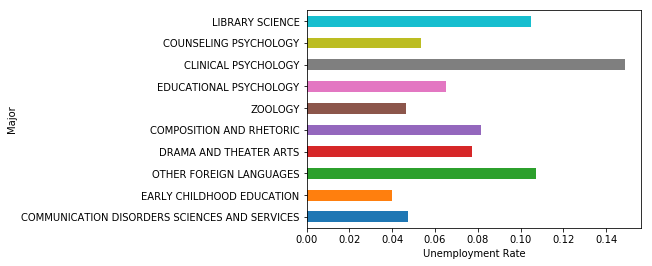

In [27]:
ax18 = recent_grads[162:].plot.barh(x='Major', y='Unemployment_rate', legend=False)
ax18.set_xlabel("Unemployment Rate");

The unemeployment rate for the first 10 majors is more scattered than for the last 10 majors.

### Next Steps

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

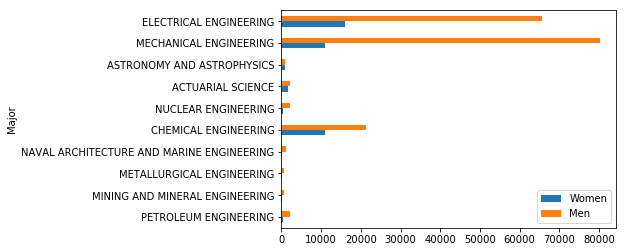

In [28]:
#ax19 = recent_grads[:10].set_index('Major')[['Women', 'Men']].plot.barh()
ax19 = recent_grads[['Women', 'Men', 'Major']][:10].plot.barh(x='Major')



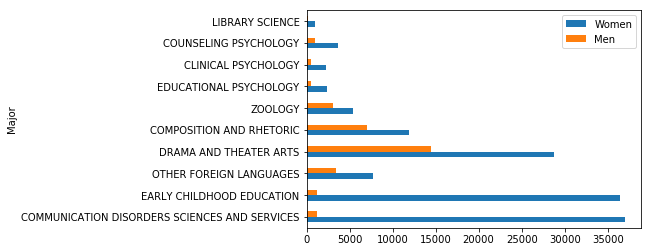

In [29]:
ax20 = recent_grads[162:].set_index('Major')[['Women', 'Men']].plot.barh()

- Use a box plot to explore the distributions of median salaries and unemployment rate.

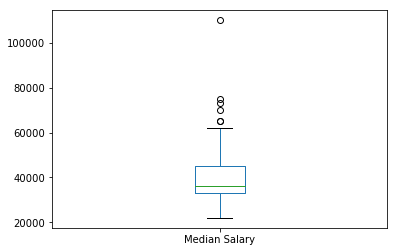

In [30]:
ax21 = recent_grads['Median'].plot.box()
ax21.set_xticklabels(['Median Salary'])

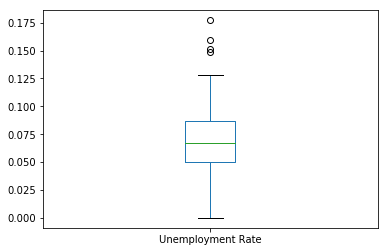

In [31]:
ax22 = recent_grads['Unemployment_rate'].plot.box()
ax22.set_xticklabels(['Unemployment Rate'])

- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

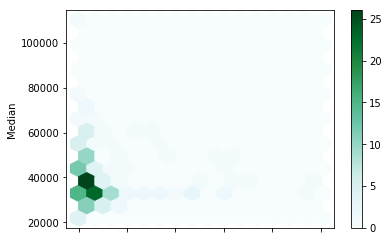

In [32]:
ax23 = recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=15)



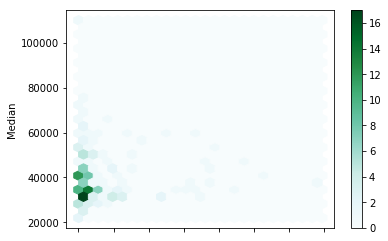

In [33]:
ax24 = recent_grads.plot.hexbin(x='Men', y='Median', gridsize=25)

